



Epoch 1/10


1563/1563 [==============================] - 23s 14ms/step - loss: 1.5276 - accuracy: 0.4357 - val_loss: 1.3130 - val_accuracy: 0.5249
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1620 - accuracy: 0.5864 - val_loss: 1.1115 - val_accuracy: 0.6104
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0078 - accuracy: 0.6453 - val_loss: 0.9709 - val_accuracy: 0.6631
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9135 - accuracy: 0.6797 - val_loss: 0.9201 - val_accuracy: 0.6724
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8366 - accuracy: 0.7052 - val_loss: 0.8962 - val_accuracy: 0.6844
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7769 - accuracy: 0.7272 - val_loss: 0.8660 - val_accuracy: 0.7018
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7352 - accuracy: 0.7420 - val_loss: 0.

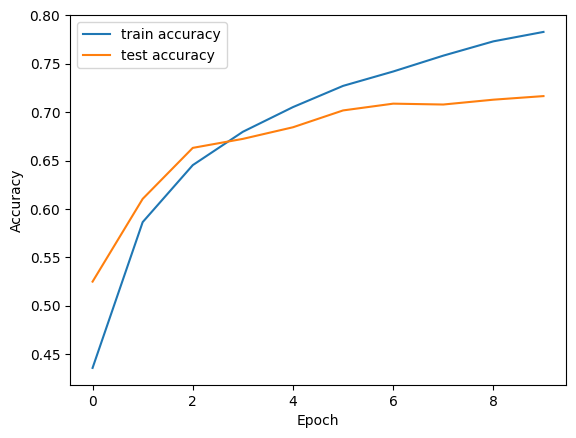

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

def build(lr,dr):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dr))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model
learning_rates = [0.0001,0.001]
dropout_rates = [0.25,0.5]

for lr in learning_rates:
    for dr in dropout_rates:
        model = build(lr,dr)
        

        history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))
        print(f"Learning Rate: {lr}, Dropout Rate: {dr}")

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

Epoch 1/2
1563/1563 [==============================] - 25s 15ms/step - loss: 1.8207 - accuracy: 0.3245 - val_loss: 1.5529 - val_accuracy: 0.4388
Epoch 2/2
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5018 - accuracy: 0.4532 - val_loss: 1.4260 - val_accuracy: 0.4801
Learning Rate: 0.0001, Dropout Rate: 0.25
Epoch 1/2
1563/1563 [==============================] - 25s 16ms/step - loss: 1.8936 - accuracy: 0.2958 - val_loss: 1.6188 - val_accuracy: 0.4091
Epoch 2/2
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5642 - accuracy: 0.4238 - val_loss: 1.4464 - val_accuracy: 0.4791
Learning Rate: 0.0001, Dropout Rate: 0.5
Epoch 1/2
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5339 - accuracy: 0.4375 - val_loss: 1.2321 - val_accuracy: 0.5580
Epoch 2/2
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1944 - accuracy: 0.5742 - val_loss: 1.0884 - val_accuracy: 0.6108
Learning Rate: 0.001, Dropout Rate: 0.25
Epoch 